In [1]:
import sys
from pymodulon.io import *
from pymodulon.plotting import *
import os
from os import path
from pymodulon.enrichment import *

In [2]:
from matplotlib_venn import venn2, venn3
from venn import venn
from tqdm.notebook import tqdm

In [3]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rc('font', family='sans-serif', size=16)
plt.rc('text', usetex=False)
plt.rc('font', serif='Arial')
plt.rcParams['axes.axisbelow'] = True

In [4]:
data_dir = path.join('..','data','processed_data')
ica_data = load_json_model(path.join(data_dir,'ica_data.json.gz'))

# Figure 1

## Figure 1a

In [5]:
metadata_raw = pd.read_csv('../metadata_combined.tsv',sep='\t')
metadata_public = metadata_raw[metadata_raw['Run'].notnull()]
metadata_public['Date'] = metadata_public['ReleaseDate'].str[0:4]

/home/annie/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
sample_count = pd.DataFrame({
    'Date': metadata_public['Date'].sort_values().unique(),
    'CumulativeSampleCount': metadata_public['Date'].value_counts().sort_index().cumsum()
})

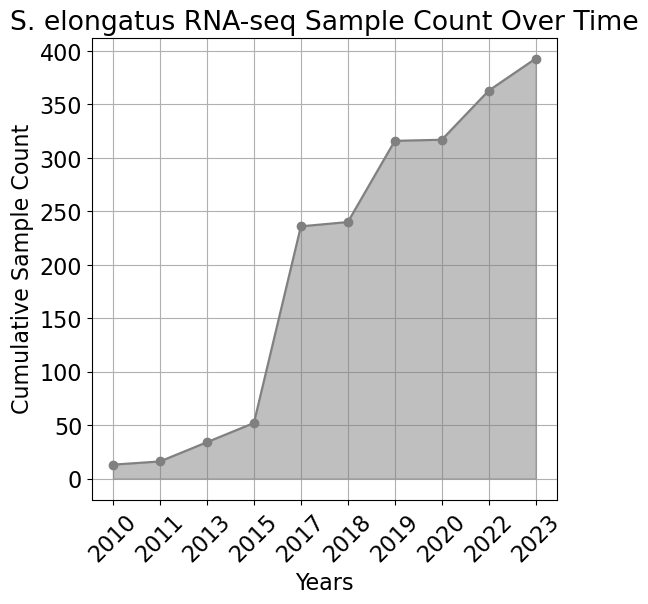

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(sample_count['Date'], sample_count['CumulativeSampleCount'], marker='o', color='gray')
plt.title('S. elongatus RNA-seq Sample Count Over Time')
plt.fill_between(sample_count['Date'], sample_count['CumulativeSampleCount'], color='grey', alpha=0.5)
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Sample Count')
plt.grid(True)
# plt.savefig('../data/Figures/F1a.pdf',bbox_inches='tight',transparent=True)

## Figure 1b

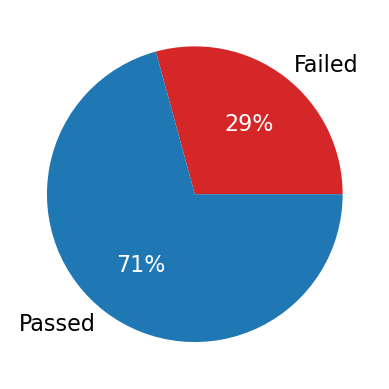

In [8]:
_,_,pcts = plt.pie([(metadata_raw.shape[0]-ica_data.sample_table.shape[0]),ica_data.sample_table.shape[0]],
                   labels = ['Failed','Passed'],
                   colors=['tab:red','tab:blue'],
                   autopct='%.0f%%',
                   textprops={'size':16});
for pct in pcts:
    pct.set_color('white')
    
# plt.savefig('../data/Figures/F1b.pdf',bbox_inches='tight',transparent=True)

## Figure 1d

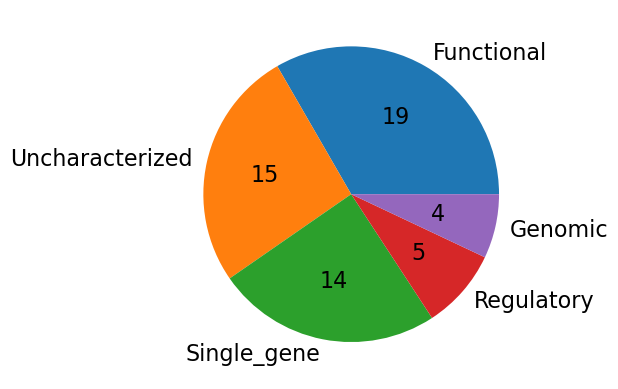

In [9]:
type_counts = ica_data.imodulon_table['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index,
        autopct=lambda p: '{:.0f}'.format(p * sum(type_counts.values) / 100))
None
# plt.savefig('../data/Figures/F1d.pdf',bbox_inches='tight',transparent=True)

## Figure 1e

In [10]:
ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True)[-15:][['type','category']]

type         category
CysR                Functional       Metabolism
unchar_2       Uncharacterized  Uncharacterized
NtcA-1              Regulatory       Metabolism
Biofilm-2              Genomic        Lifestyle
RpaB                Functional           Stress
NtcA-2              Regulatory       Metabolism
Cytc_oxidases       Functional           Energy
unchar_11      Uncharacterized  Uncharacterized
ccm-1               Regulatory        Transport
HSR                 Functional           Stress
Photosystems        Functional           Energy
RpaC           Uncharacterized  Uncharacterized
competence     Uncharacterized  Uncharacterized
RpaA                Regulatory    Transcription
unchar_3       Uncharacterized  Uncharacterized

Text(0, 0.5, 'iModulons')

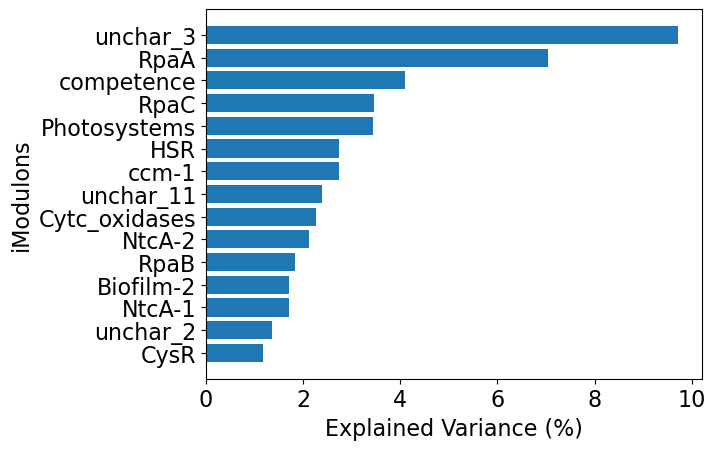

In [11]:
plt.barh(y = [str(x) for x in ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).index[-15:]],
        width=ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).explained_variance[-15:]*100)
plt.xlabel('Explained Variance (%)')
plt.ylabel('iModulons')
# plt.savefig('../data/Figures/F1e.pdf',bbox_inches ='tight',transparent=True)

## Figure 1f

In [12]:
import plotly.express as px
fig = px.treemap(ica_data.imodulon_table.reset_index(),
                path = ['category','index'],
                values='explained_variance')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()
# fig.write_image('../data/Figures/F1f.pdf',bbox_inches ='tight',transparent=True)

# Figure 2

## Figure 2a

In [13]:
# From PMC3935230
# Can also be found in the updated TRN file
rpaa_regulon = ["Synpcc7942_0004", "Synpcc7942_0012", "Synpcc7942_0013", "Synpcc7942_0017", "Synpcc7942_0018", "Synpcc7942_0065", "Synpcc7942_0095", "Synpcc7942_0100", "Synpcc7942_0101", "Synpcc7942_0102", "Synpcc7942_0156", "Synpcc7942_0157", "Synpcc7942_0170", "Synpcc7942_0171", "Synpcc7942_0172", "Synpcc7942_0243", "Synpcc7942_0244", "Synpcc7942_0245", "Synpcc7942_0314", "Synpcc7942_0315", "Synpcc7942_0316", "Synpcc7942_0342", "Synpcc7942_0369", "Synpcc7942_0370", "Synpcc7942_0371", "Synpcc7942_0394", "Synpcc7942_0433", "Synpcc7942_0434", "Synpcc7942_0457", "Synpcc7942_0462", "Synpcc7942_0463", "Synpcc7942_0464", "Synpcc7942_0465", "Synpcc7942_0466", "Synpcc7942_0467", "Synpcc7942_0468", "Synpcc7942_0469", "Synpcc7942_0482", "Synpcc7942_0483", "Synpcc7942_0556", "Synpcc7942_0557", "Synpcc7942_0558", "Synpcc7942_0570", "Synpcc7942_0571", "Synpcc7942_0572", "Synpcc7942_0657", "Synpcc7942_0797", "Synpcc7942_0834", "Synpcc7942_0846", "Synpcc7942_0847", "Synpcc7942_0891", "Synpcc7942_0905", "Synpcc7942_0906", "Synpcc7942_1150", "Synpcc7942_1156", "Synpcc7942_1157", "Synpcc7942_1164", "Synpcc7942_1216", "Synpcc7942_1217", "Synpcc7942_1313", "Synpcc7942_1327", "Synpcc7942_1328", "Synpcc7942_1336", "Synpcc7942_1337", "Synpcc7942_1393", "Synpcc7942_1475", "Synpcc7942_1505", "Synpcc7942_1506", "Synpcc7942_1548", "Synpcc7942_1552", "Synpcc7942_1553", "Synpcc7942_1557", "Synpcc7942_1572", "Synpcc7942_1573", "Synpcc7942_1574", "Synpcc7942_1575", "Synpcc7942_1586", "Synpcc7942_1610", "Synpcc7942_1611", "Synpcc7942_1612", "Synpcc7942_1621", "Synpcc7942_1622", "Synpcc7942_1646", "Synpcc7942_1647", "Synpcc7942_1656", "Synpcc7942_1661", "Synpcc7942_1740", "Synpcc7942_1741", "Synpcc7942_1742", "Synpcc7942_1745", "Synpcc7942_1746", "Synpcc7942_1753", "Synpcc7942_1754", "Synpcc7942_1755", "Synpcc7942_1756", "Synpcc7942_1757", "Synpcc7942_1784", "Synpcc7942_1802", "Synpcc7942_1803", "Synpcc7942_1804", "Synpcc7942_1833", "Synpcc7942_1834", "Synpcc7942_1835", "Synpcc7942_1849", "Synpcc7942_1914", "Synpcc7942_1949", "Synpcc7942_1950", "Synpcc7942_1951", "Synpcc7942_1960", "Synpcc7942_1974", "Synpcc7942_1975", "Synpcc7942_1976", "Synpcc7942_1987", "Synpcc7942_1999", "Synpcc7942_2058", "Synpcc7942_2059", "Synpcc7942_2113", "Synpcc7942_2114", "Synpcc7942_2116", "Synpcc7942_2117", "Synpcc7942_2118", "Synpcc7942_2119", "Synpcc7942_2120", "Synpcc7942_2121", "Synpcc7942_2185", "Synpcc7942_2248", "Synpcc7942_2254", "Synpcc7942_2266", "Synpcc7942_2267", "Synpcc7942_2279", "Synpcc7942_2306", "Synpcc7942_2307", "Synpcc7942_2308", "Synpcc7942_2326", "Synpcc7942_2333", "Synpcc7942_2334", "Synpcc7942_2335", "Synpcc7942_2336", "Synpcc7942_2378", "Synpcc7942_2379", "Synpcc7942_2387", "Synpcc7942_2388", "Synpcc7942_2394", "Synpcc7942_2395", "Synpcc7942_2460", "Synpcc7942_2473", "Synpcc7942_2474", "Synpcc7942_2475", "Synpcc7942_2487", "Synpcc7942_2488", "Synpcc7942_2522", "Synpcc7942_2523", "Synpcc7942_2524", "Synpcc7942_2525", "Synpcc7942_2526", "Synpcc7942_2527", "Synpcc7942_2552", "Synpcc7942_2553", "Synpcc7942_2554", "Synpcc7942_2555", "Synpcc7942_2556", "Synpcc7942_2557", "Synpcc7942_2590", "Synpcc7942_2591", "Synpcc7942_2596", "Synpcc7942_2597", "Synpcc7942_2605", "Synpcc7942_R0032", "Synpcc7942_R0002", "Synpcc7942_R0024"]

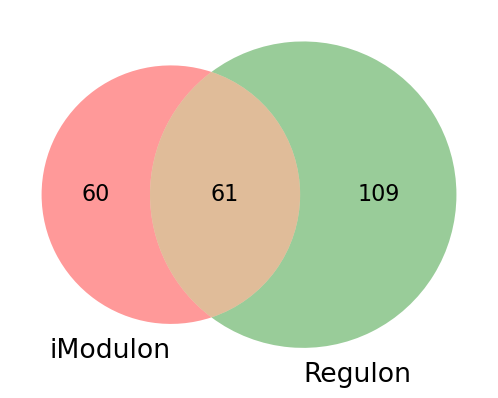

In [14]:
venn2([set(ica_data.view_imodulon('RpaA').index),set(rpaa_regulon)],
     set_labels=('iModulon','Regulon'))
# plt.savefig('../data/Figures/F2a.pdf',bbox_inches ='tight',transparent=True)

## Figure 2b

In [15]:
def CD_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ['SRX3211320','SRX3211321']
    _2h = ['SRX3211322','SRX3211323']
    _4h = ['SRX3211324','SRX3211325']
    _6h = ['SRX3211326','SRX3211327']
    _8h = ['SRX3211328','SRX3211329']
    _9h = ['SRX3211330','SRX3211331']
    _10h = ['SRX3211332','SRX3211333']
    _12h = ['SRX3211334','SRX3211335']
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['CD_2h','CD_4h','CD_6h',
                                                                            'CD_8h','CD_9h','CD_10h','CD_12h'])
    return activity_df

In [16]:
def LL_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ["SRX3211304", "SRX3211305"]
    _2h = ["SRX3211306", "SRX3211307"]
    _4h = ["SRX3211308", "SRX3211309"]
    _6h = ["SRX3211310", "SRX3211311"]
    _8h = ["SRX3211312", "SRX3211313"]
    _9h = ["SRX3211314", "SRX3211315"]
    _10h = ["SRX3211316", "SRX3211317"]
    _12h = ["SRX3211318", "SRX3211319"]
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['LL_2h','LL_4h','LL_6h',
                                                                            'LL_8h','LL_9h','LL_10h','LL_12h'])
    return activity_df

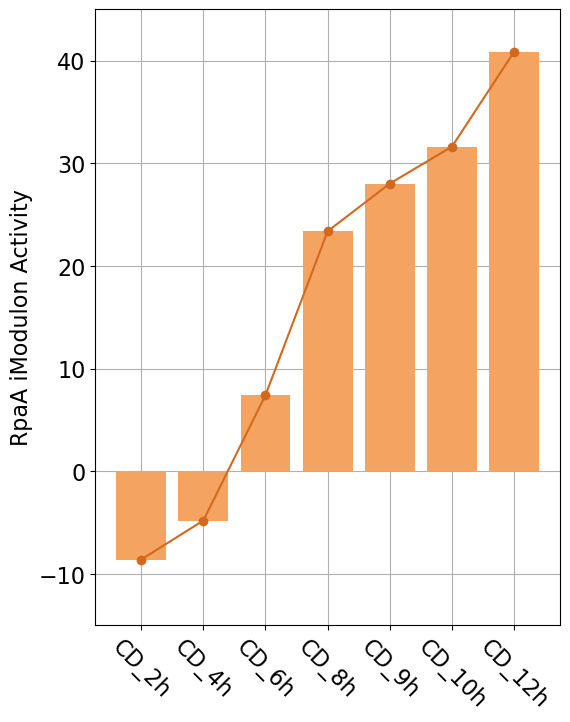

In [17]:
plt.figure(figsize=(6,8))
plt.bar(CD_activity(ica_data,['RpaA']).T.index,height=CD_activity(ica_data,['RpaA']).loc['RpaA'],
       color='sandybrown')
plt.plot(CD_activity(ica_data,['RpaA']).T,'-o',color='chocolate')
plt.xticks(rotation=-45)
plt.ylabel('RpaA iModulon Activity')
plt.ylim([-15,45])
plt.grid(True)
# plt.savefig('../data/Figures/F2b_1.pdf',bbox_inches='tight',transparent=True)
None

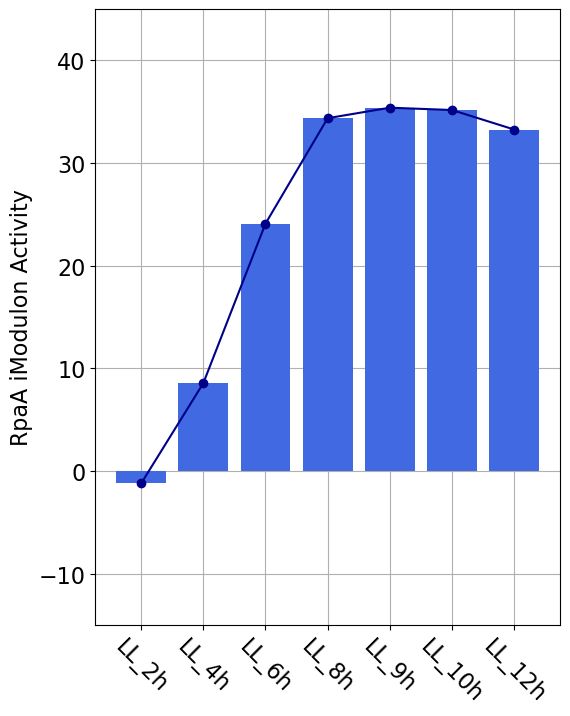

In [18]:
plt.figure(figsize=(6,8))
plt.bar(LL_activity(ica_data,['RpaA']).T.index,height=LL_activity(ica_data,['RpaA']).loc['RpaA'],
       color='royalblue')
plt.plot(LL_activity(ica_data,['RpaA']).T,'-o',color='darkblue')
plt.xticks(rotation=-45)
plt.ylabel('RpaA iModulon Activity')
plt.ylim([-15,45])
plt.grid(True)
# plt.savefig('../data/Figures/F2b_1.pdf',bbox_inches='tight',transparent=True)
None

## Figure 2c

<AxesSubplot:>

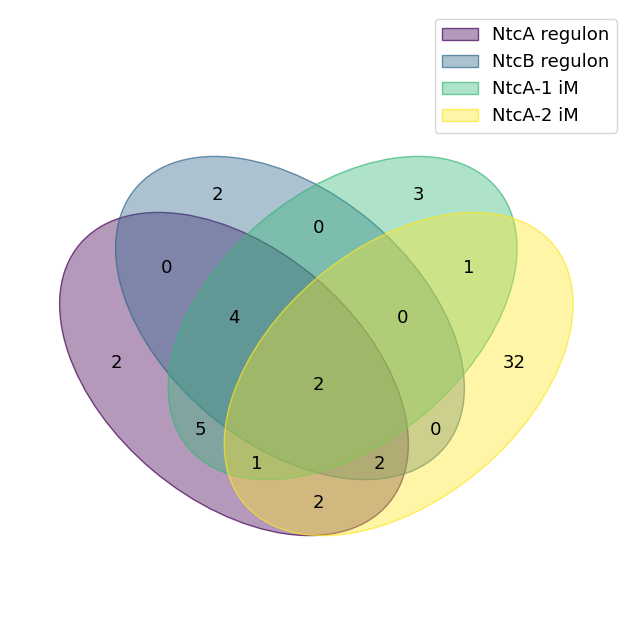

In [19]:
venn({'NtcA regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id),
      'NtcB regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcB'].gene_id),
      'NtcA-1 iM':set(ica_data.view_imodulon('NtcA-1').index),
      'NtcA-2 iM':set(ica_data.view_imodulon('NtcA-2').index)})
# plt.savefig('../data/Figures/F2c.pdf',bbox_inches ='tight',transparent=True)

# Figure 4

## Figure 4a

<AxesSubplot:xlabel='Gene Start', ylabel='CysR Gene Weight'>

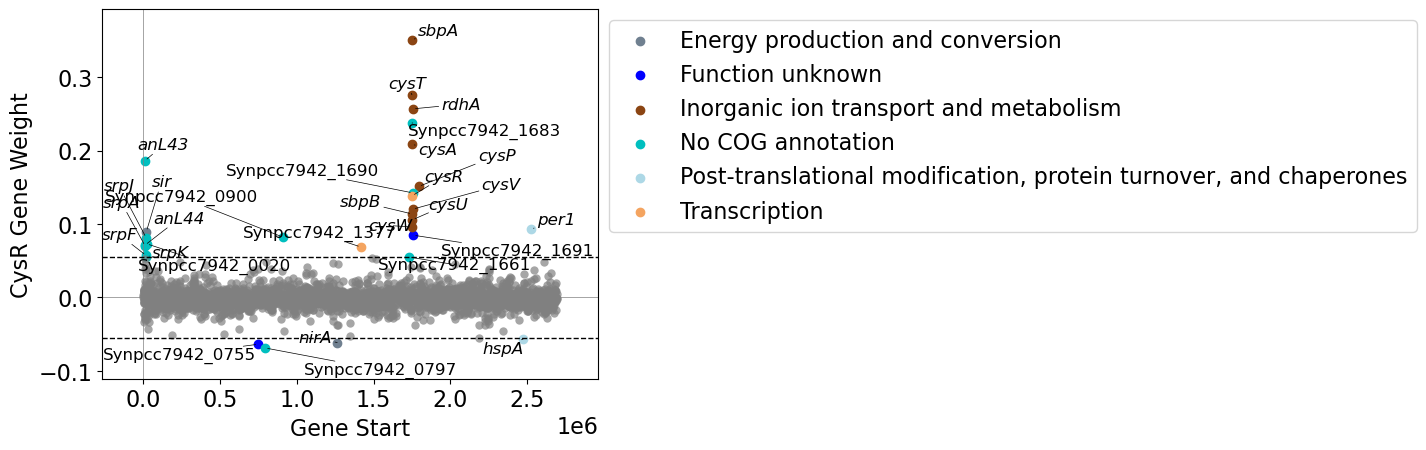

In [20]:
plot_gene_weights(ica_data,'CysR',show_labels=True)
# plt.savefig('../data/Figures/F4a.pdf',bbox_inches='tight',transparent=True)

## Figure 4b

In [21]:
ica_data.sample_table.loc['SRX3211336','condition']='Ctrl_LL_8h'
ica_data.sample_table.loc['SRX3211337','condition']='Ctrl_LL_8h'

ica_data.sample_table.loc['SRX3211338','condition']='HP_15'
ica_data.sample_table.loc['SRX3211339','condition']='HP_15'

ica_data.sample_table.loc['SRX3211340','condition']='HP_30'
ica_data.sample_table.loc['SRX3211341','condition']='HP_30'

ica_data.sample_table.loc['SRX3211301','condition']='HP_60'
ica_data.sample_table.loc['SRX3211342','condition']='HP_60'

ica_data.sample_table.loc['SRX3211302','condition']='HP_LL_15'
ica_data.sample_table.loc['SRX3211303','condition']='HP_LL_15'

ica_data.sample_table.loc['SRX3211343','condition']='HP_LL_30'
ica_data.sample_table.loc['SRX3211344','condition']='HP_LL_30'

ica_data.sample_table.loc['SRX3211345','condition']='LL_10h'
ica_data.sample_table.loc['SRX3211346','condition']='LL_10h'

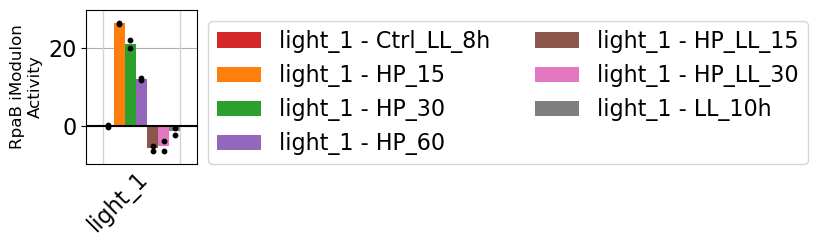

In [22]:
plot_activities(ica_data,'RpaB',projects='light_1')
plt.grid(True)
# plt.savefig('../data/Figures/F4b.pdf',bbox_inches='tight',transparent=True)

## Figure 4c

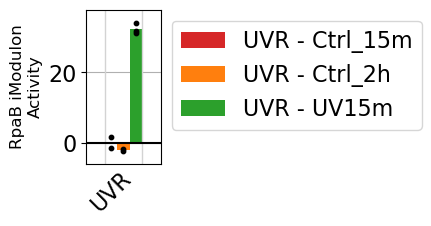

In [23]:
plot_activities(ica_data,'RpaB',projects='UVR')
plt.grid(True)
# plt.savefig('../data/Figures/F4c.pdf',bbox_inches='tight',transparent=True)

## Figure 4d

In [24]:
# Figure 5 source data 5 from  https://doi.org/10.7554/eLife.32032
rpab_chip = pd.read_excel('~/Downloads/elife-32032-fig5-data2.xlsx',sheet_name='Replicate 1',skiprows=4)
rpab_chip = rpab_chip[~rpab_chip['Gene target of peak'].isna()]

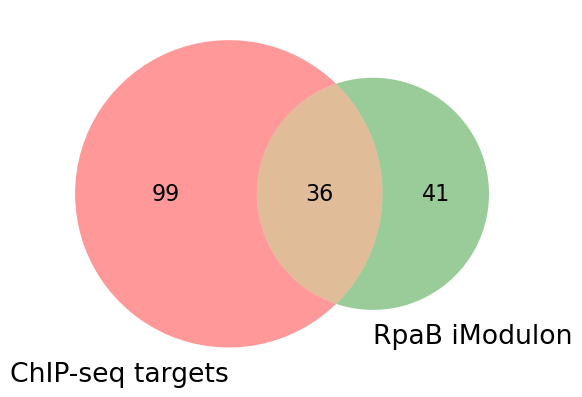

In [25]:
venn2([set(rpab_chip['Gene target of peak']),set(ica_data.view_imodulon('RpaB').index)],
     set_labels=['ChIP-seq targets','RpaB iModulon'])
# plt.savefig('../data/Figures/F4d.pdf',bbox_inches='tight',transparent=True)

## Figure 4e

<AxesSubplot:xlabel='Gene Start', ylabel='Biofilm-1 Gene Weight'>

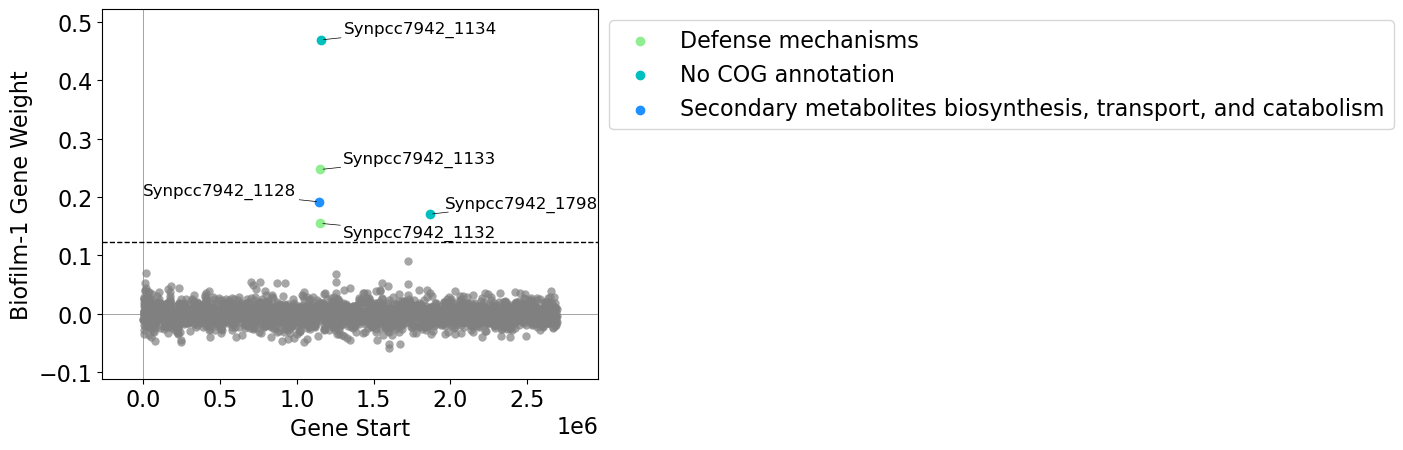

In [26]:
plot_gene_weights(ica_data,'Biofilm-1')
# plt.savefig('../data/Figures/F4e.pdf',bbox_inches='tight',transparent=True)

## Figure 4f

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

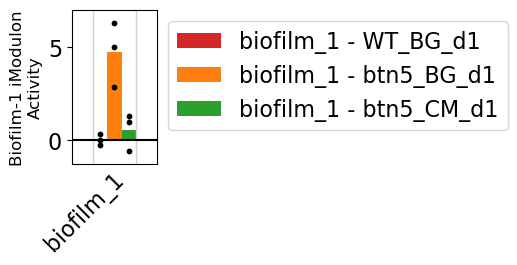

In [27]:
plot_activities(ica_data,'Biofilm-1',projects='biofilm_1')
# plt.savefig('../data/Figures/F4f.pdf',bbox_inches='tight',transparent=True)

## Figure 4g

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

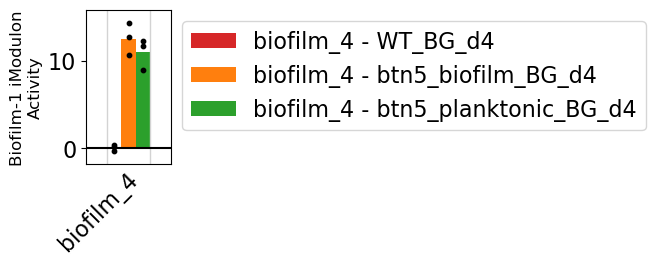

In [28]:
plot_activities(ica_data,'Biofilm-1',projects='biofilm_4')
# plt.savefig('../data/Figures/F4g.pdf',bbox_inches='tight',transparent=True)

# Figure 5

## Figure 5a

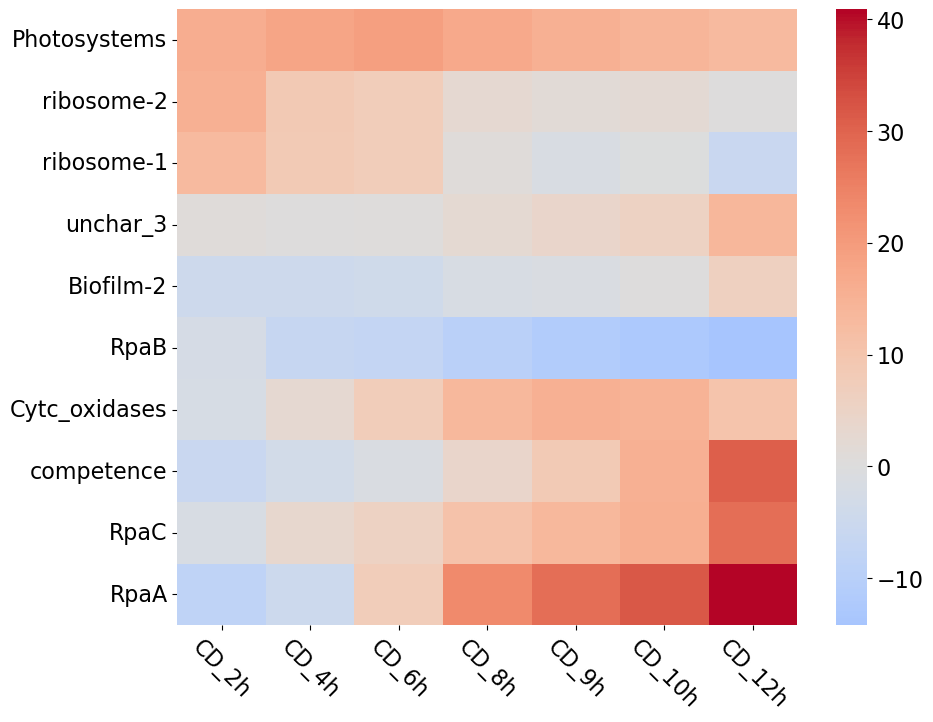

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(CD_activity(ica_data,['Photosystems','ribosome-2','ribosome-1','unchar_3','Biofilm-2',"RpaB",
                                      'Cytc_oxidases',
                                      'competence','RpaC','RpaA']),cmap='coolwarm',center=0)

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Figures/F5a.pdf',bbox_inches='tight',transparent=True)

## Figure 5b

In [30]:
def dark(ica_data,imod_list):
    A = ica_data.A
    _15 = ['SRX3176782','SRX3176800']
    _30 = ['SRX3176783','SRX3176801']
    _60 = ['SRX3176784','SRX3176802']
    _120 = ['SRX3176785','SRX3176803']
    _240 = ['SRX3176786','SRX3176804']
    _480 = ['SRX3176787','SRX3176805']
    _720 = ['SRX3176788','SRX3176806']
    
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [_15, _30, _60, _120, _240, _480, _720]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    col_index = ["0.25 h", "0.5 h", "1 h", "2 h", "4 h", "8 h", "12 h"]

    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = col_index)
    return activity_df

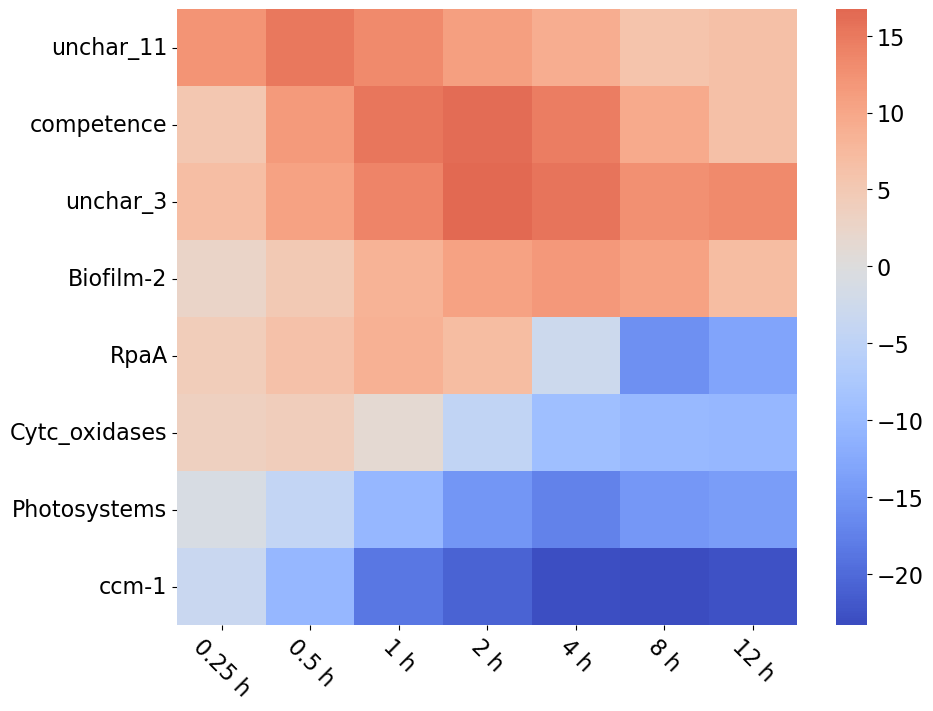

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(dark(ica_data,['unchar_11','competence','unchar_3','Biofilm-2','RpaA','Cytc_oxidases',
                           'Photosystems','ccm-1']),cmap='coolwarm',center=0)

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Figures/F5b.pdf',bbox_inches='tight',transparent=True)

## Figure 5c

In [32]:
def shade_pulse(ica_data,imod_list):
    A = ica_data.A
    ctrl = ['SRX3211347','SRX3211348']
    sp_15 = ['SRX3211349','SRX3211350']
    sp_30 = ['SRX3211351','SRX3211352']
    sp_60 = ['SRX3211353','SRX3211354']
    sp_cd_15 = ['SRX3211355','SRX3211356']
    sp_cd_30 = ['SRX3211357','SRX3211358']
    sp_cd_60 = ['SRX3211359','SRX3211360']
    
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [ctrl,sp_15,sp_30,sp_60,sp_cd_15,sp_cd_30,sp_cd_60]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['CD_8h','SP_15m','SP_30m','SP_60m',
                                                                         'SP_CD_15m','SP_CD_30m','CD_10h',
                                                                         ])
    return activity_df

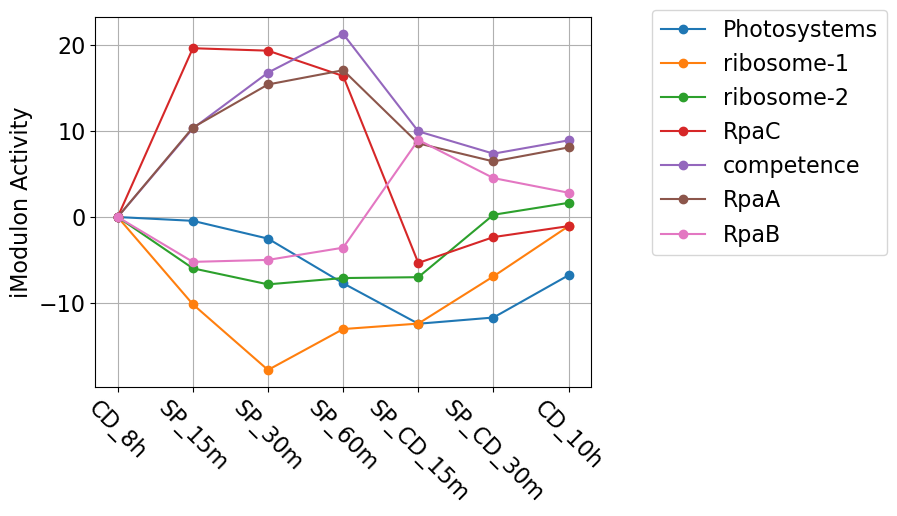

In [33]:
plt.figure()
plt.plot(shade_pulse(ica_data,['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB']).T,'-o')
plt.xticks(rotation=-45)
plt.ylabel('iModulon Activity')
plt.legend(['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB'],bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
# plt.savefig('../data/Figures/F5c.pdf',bbox_inches='tight',transparent=True)

## Figure 5d

In [34]:
def high_light(ica_data,imod_list):
    A = ica_data.A
    ctrl = ['SRX3211336','SRX3211337']
    hp_15 = ['SRX3211338','SRX3211339']
    hp_30 = ['SRX3211340','SRX3211341']
    hp_60 = ['SRX3211301','SRX3211342']
    hp_ll_15 = ['SRX3211302','SRX3211303']
    hp_ll_30 = ['SRX3211343','SRX3211344']
    hp_ll_60 = ['SRX3211345','SRX3211346']
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [ctrl,hp_15,hp_30,hp_60,hp_ll_15,hp_ll_30,hp_ll_60]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['LL_8h','HP_15m','HP_30m','HP_60m',
                                                                         'HP_LL_15m','HP_LL_30m','LL_10h'])
    return activity_df

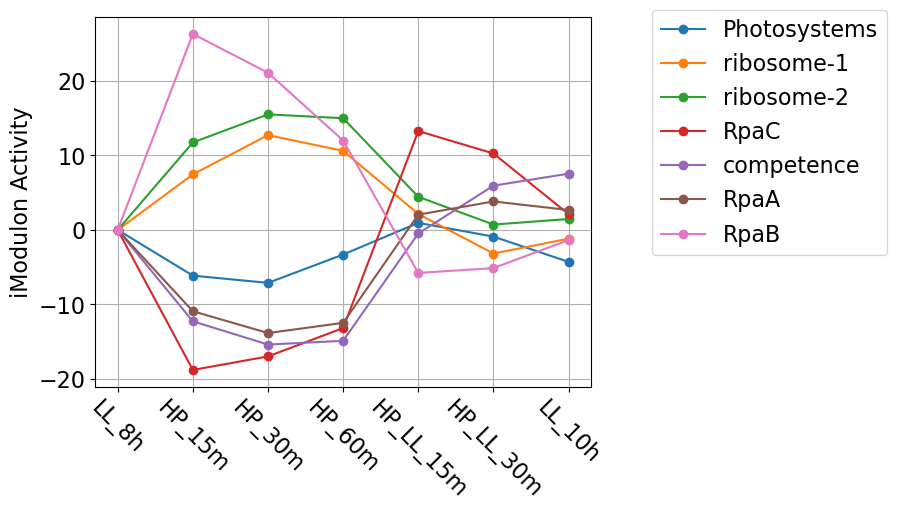

In [35]:
plt.figure()
plt.plot(high_light(ica_data,['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB']).T,'-o')
plt.xticks(rotation=-45)
plt.ylabel('iModulon Activity')
plt.legend(['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB'],bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
# plt.savefig('../data/Figures/F5d.pdf',bbox_inches='tight',transparent=True)

# Supplements

## Supplementary Table 1

In [36]:
# Dusk and dawn gene list from supplementary table of https://www.pnas.org/doi/full/10.1073/pnas.0912673106
dusk_dawn = pd.read_excel('~/Downloads/sd1.xlsx',sheet_name = 'Analysis of Circadian Gene Exp',index_col=0)
dusk_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 1]['7942 ID'].dropna()
dawn_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 2]['7942 ID'].dropna()

In [37]:
supp_table1 = ica_data.view_imodulon('RpaA')
supp_table1['gene_type'] = ''

supp_table1.loc[supp_table1.index.isin(dusk_genes), 'gene_type'] = 'dusk'
supp_table1.loc[supp_table1.index.isin(dawn_genes), 'gene_type'] = 'dawn'

In [38]:
# supp_table1.to_csv('../data/Supplementary_data/Supplementary_table1.csv')

## Supplementary Table 2

In [39]:
supp_table2 = ica_data.view_imodulon('PSII')
# supp_table2.to_csv('../data/Supplementary_data/Supplementary_table2.csv')

## Supplementary Table 3

In [40]:
supp_table3 = ica_data.view_imodulon('Photosystems')
# supp_table3.to_csv('../data/Supplementary_data/Supplementary_table3.csv')

## Figure S1

<AxesSubplot:xlabel='Gene Start', ylabel='NtcA-1 Gene Weight'>

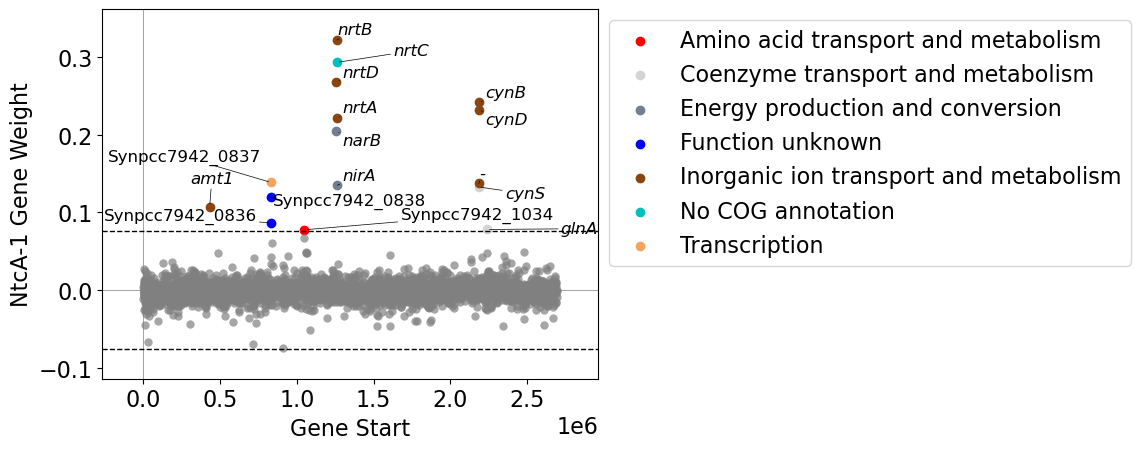

In [41]:
plot_gene_weights(ica_data,'NtcA-1',show_labels=True)
# plt.savefig('../data/Supplementary_data/Figures/S1a.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:xlabel='Gene Start', ylabel='NtcA-2 Gene Weight'>

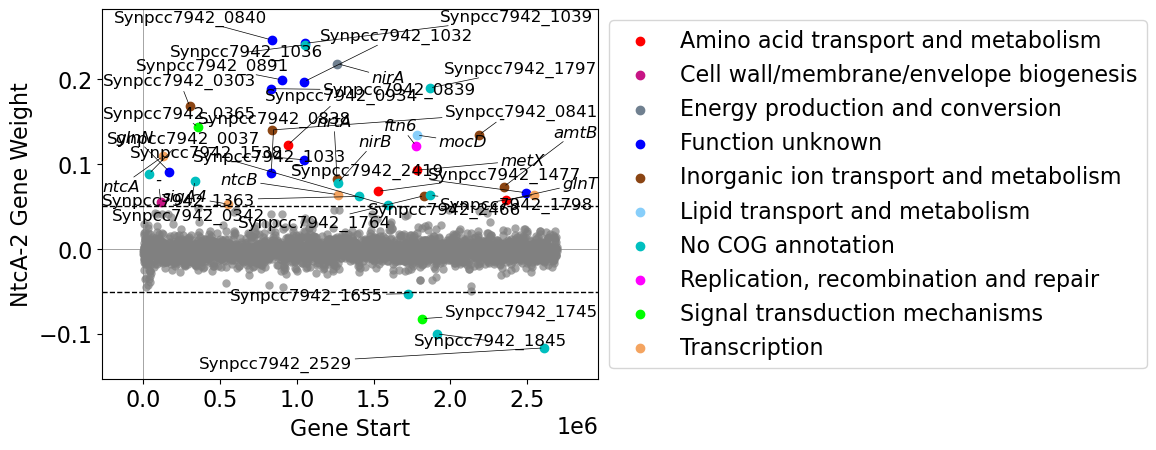

In [42]:
plot_gene_weights(ica_data,'NtcA-2',show_labels=True)
# plt.savefig('../data/Supplementary_data/Figures/S1b.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:xlabel='NtcA-1 Gene Weight', ylabel='NtcA-2 Gene Weight'>

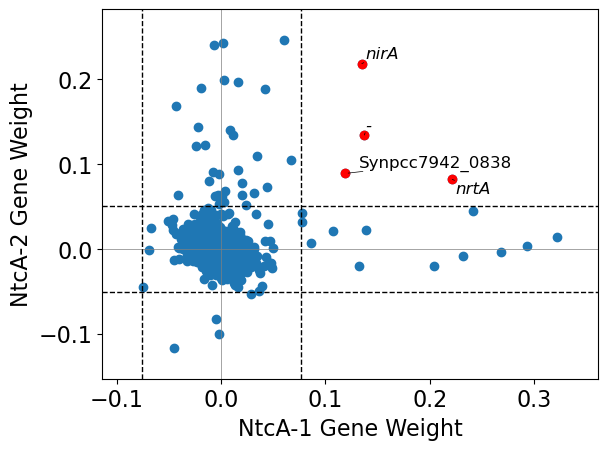

In [43]:
compare_gene_weights(ica_data,'NtcA-1','NtcA-2')
# plt.savefig('../data/Supplementary_data/Figures/S1c.pdf',bbox_inches='tight',transparent=True)

## Figure S2

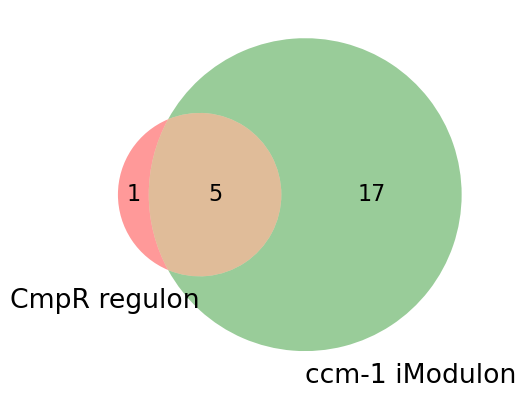

In [44]:
ccmr = set(ica_data.trn[ica_data.trn.regulator=='ccmR'].gene_id)

venn2([ccmr,set(ica_data.view_imodulon('ccm-1').index)],set_labels=('CmpR regulon','ccm-1 iModulon'))
# plt.savefig('../data/Supplementary_data/Figures/S2.pdf',bbox_inches='tight',transparent=True)

## Figure S3

<AxesSubplot:ylabel='PSII iModulon\nActivity'>

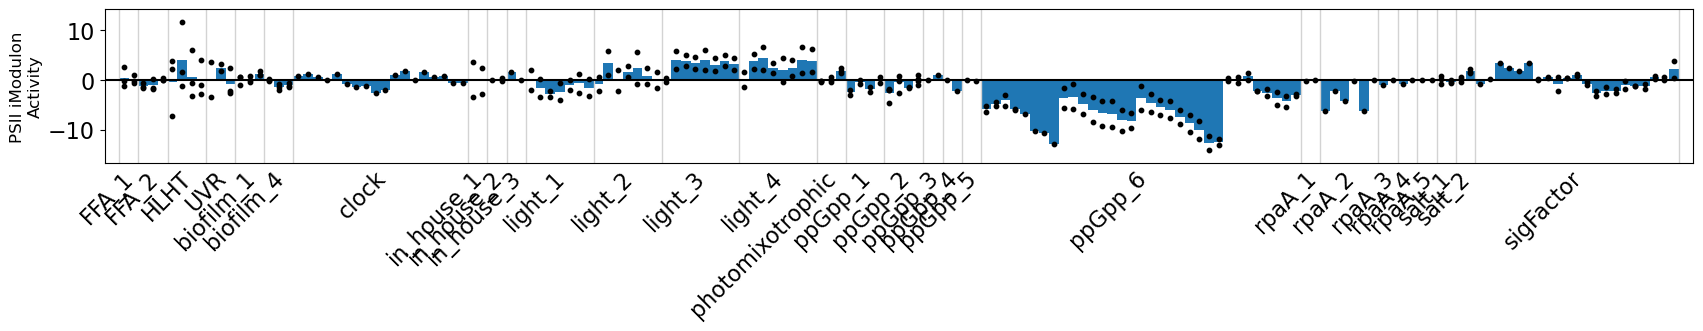

In [45]:
plot_activities(ica_data,'PSII')
# plt.savefig('../data/Supplementary_data/Figures/S3a.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:ylabel='Photosystems iModulon\nActivity'>

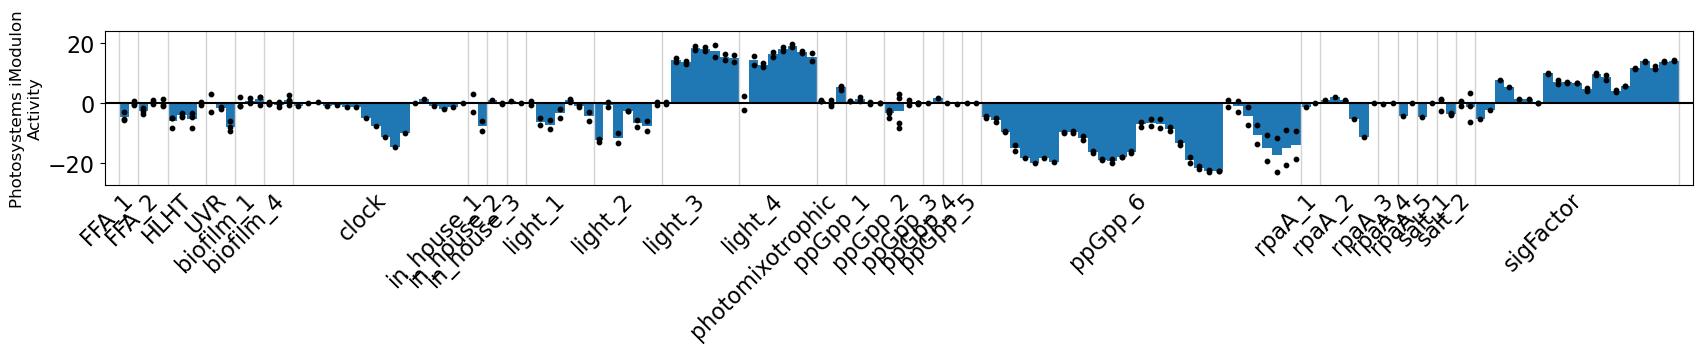

In [46]:
plot_activities(ica_data,'Photosystems')
# plt.savefig('../data/Supplementary_data/Figures/S3b.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:xlabel='Photosystems iModulon Activity', ylabel='PSII iModulon Activity'>

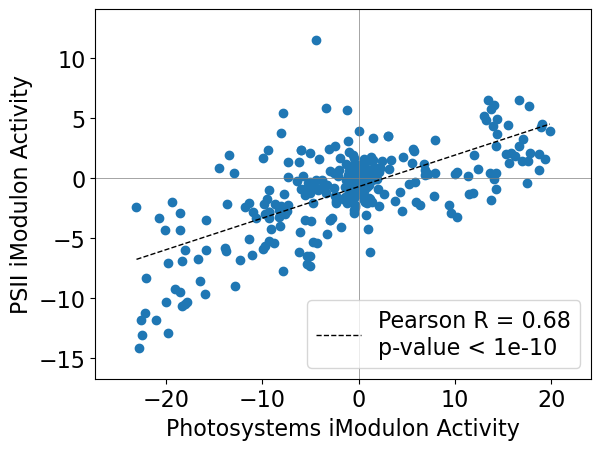

In [47]:
compare_activities(ica_data,'Photosystems','PSII')
# plt.savefig('../data/Supplementary_data/Figures/S3c.pdf',bbox_inches='tight',transparent=True)

## Figure S4

<AxesSubplot:xlabel='RpaB iModulon Activity', ylabel='Photosystems iModulon Activity'>

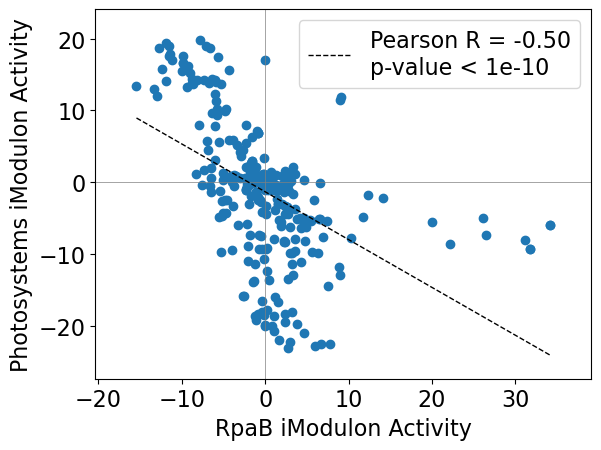

In [48]:
compare_activities(ica_data,'RpaB','Photosystems')
# plt.savefig('../data/Supplementary_data/Figures/S4.pdf',bbox_inches='tight',transparent=True)

## Figure S5

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='competence iModulon Activity'>

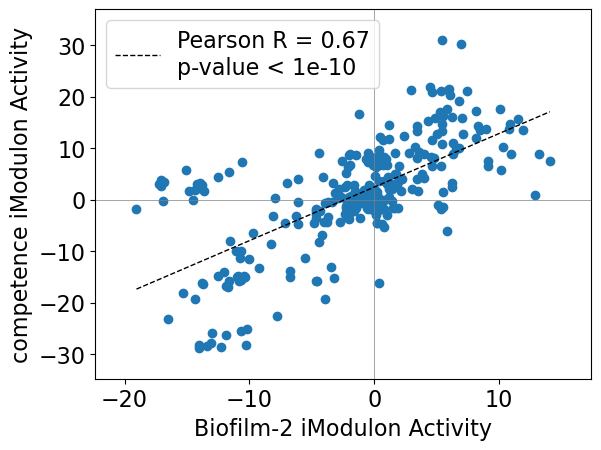

In [49]:
compare_activities(ica_data,'Biofilm-2','competence')
# plt.savefig('../data/Supplementary_data/Figures/S5a.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='phototaxis iModulon Activity'>

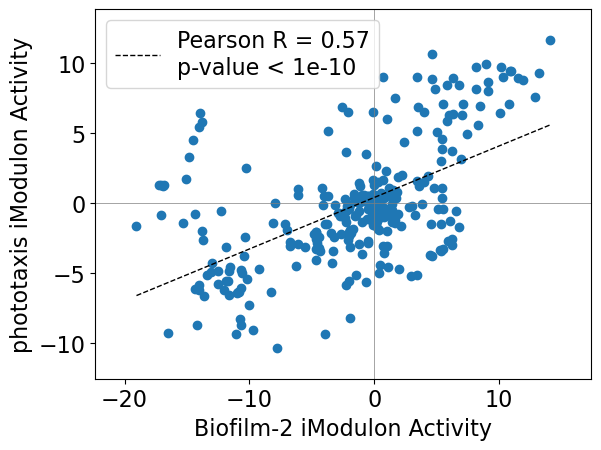

In [50]:
compare_activities(ica_data,'Biofilm-2','phototaxis')
# plt.savefig('../data/Supplementary_data/Figures/S5b.pdf',bbox_inches='tight',transparent=True)

## Figure S6

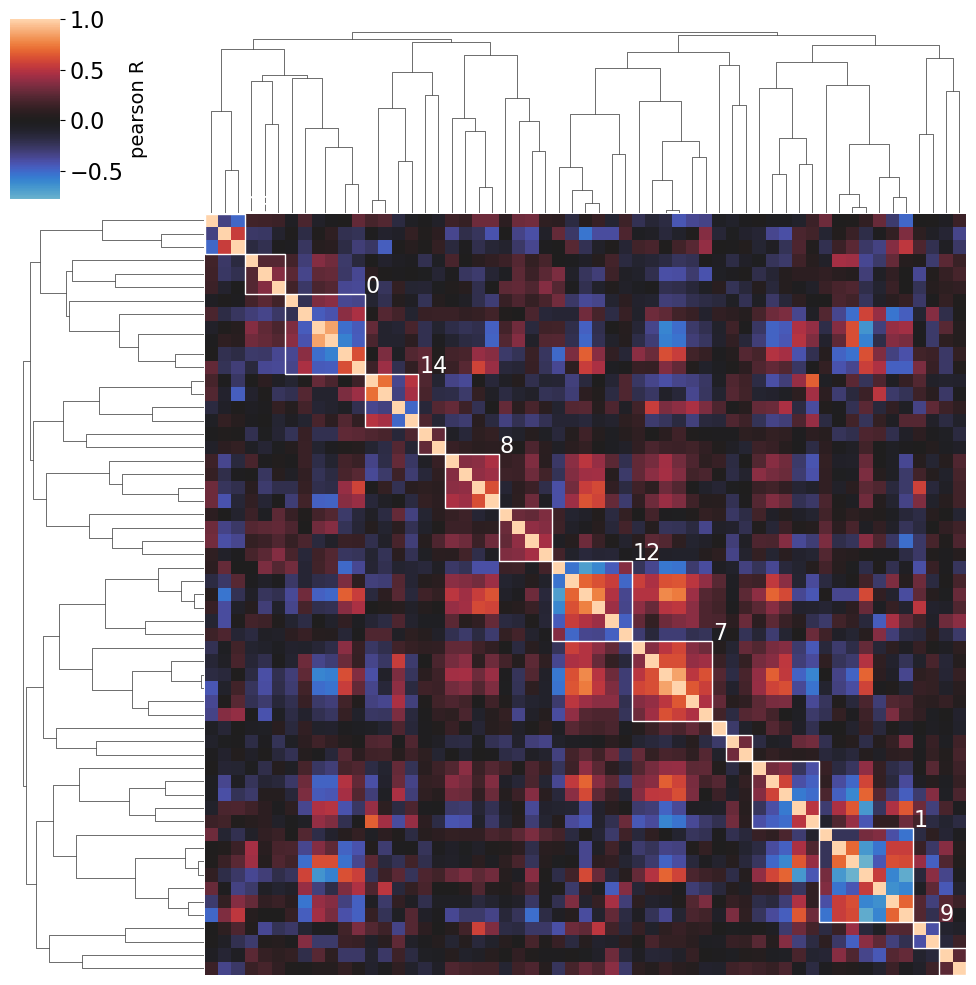

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.8, linkage='complete',
                         n_clusters=None),

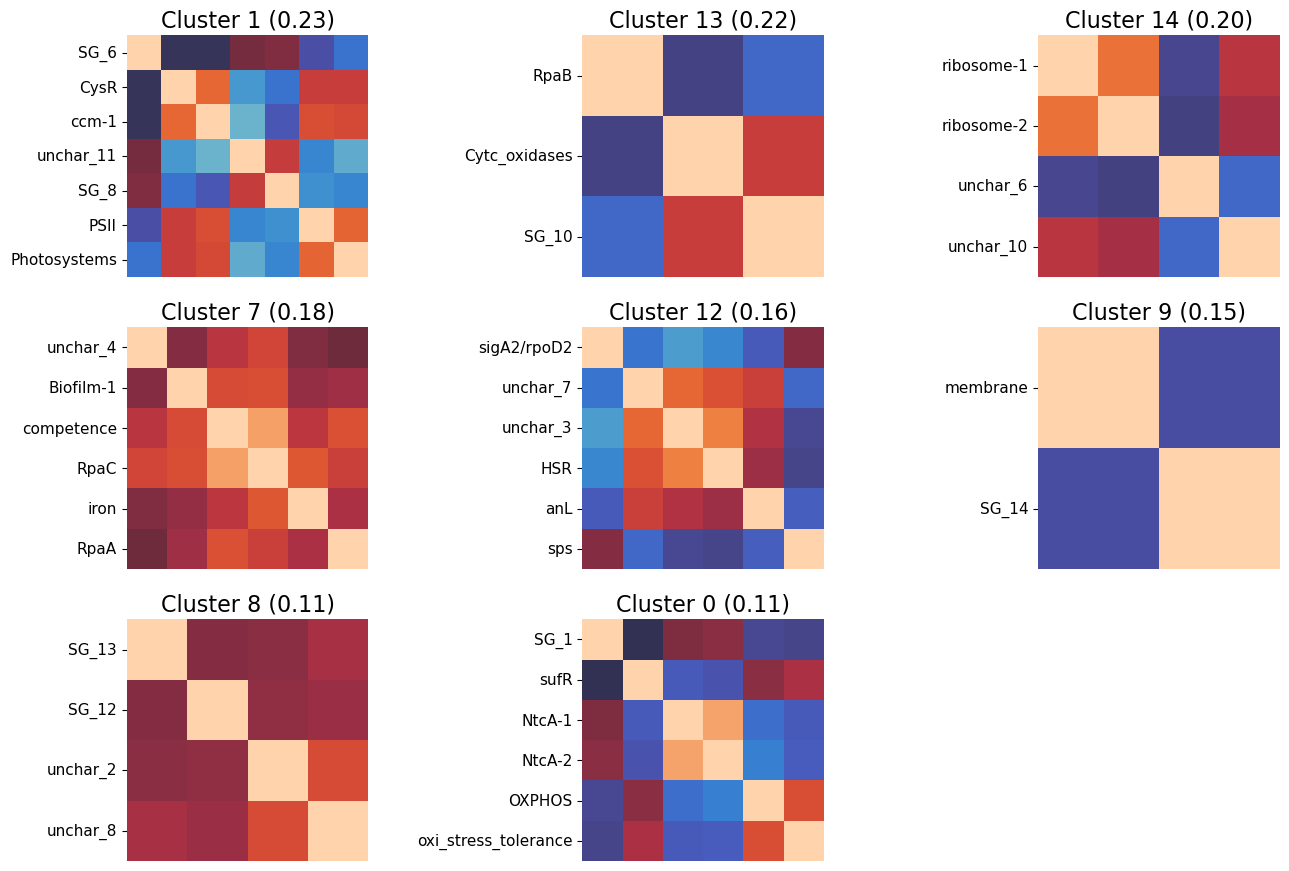

In [51]:
cluster_activities(ica_data,
                   distance_threshold=0.8,
                   return_clustermap = True,
                   show_best_clusters = True,
                   correlation_method = 'pearson')
# plt.savefig('../data/Supplementary_data/Figures/S6b.pdf',bbox_inches='tight',transparent=True)

## Figure S7

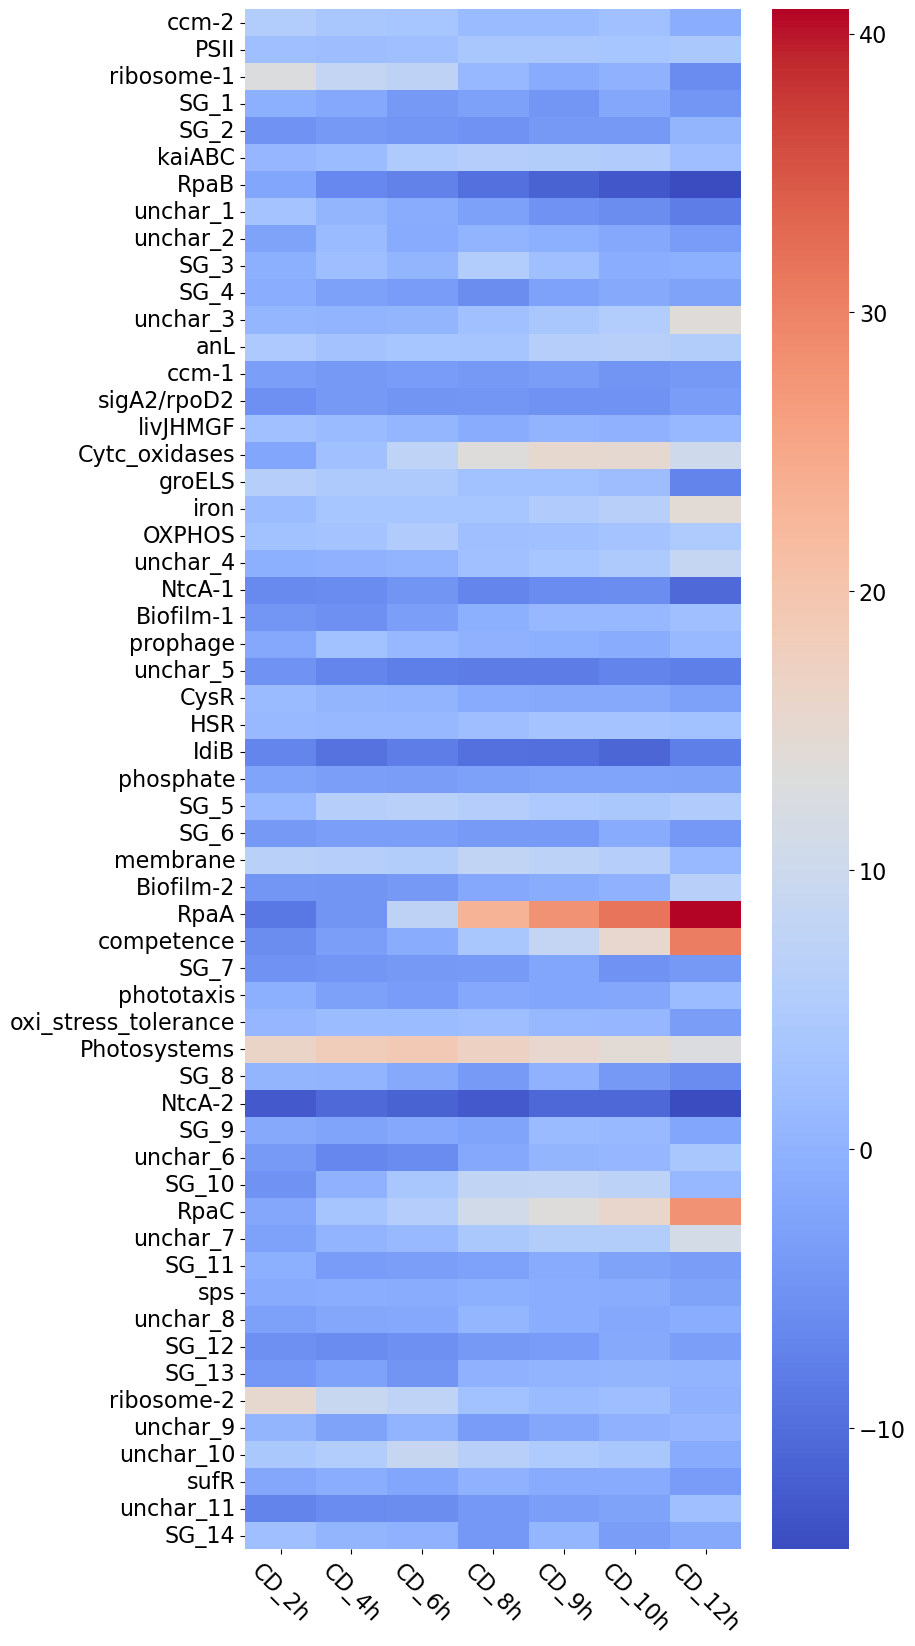

In [52]:
plt.figure(figsize=(8,20))
sns.heatmap(CD_activity(ica_data,ica_data.imodulon_names),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Supplementary_data/Figures/S7.pdf',bbox_inches='tight',transparent=True)

## Figure S8

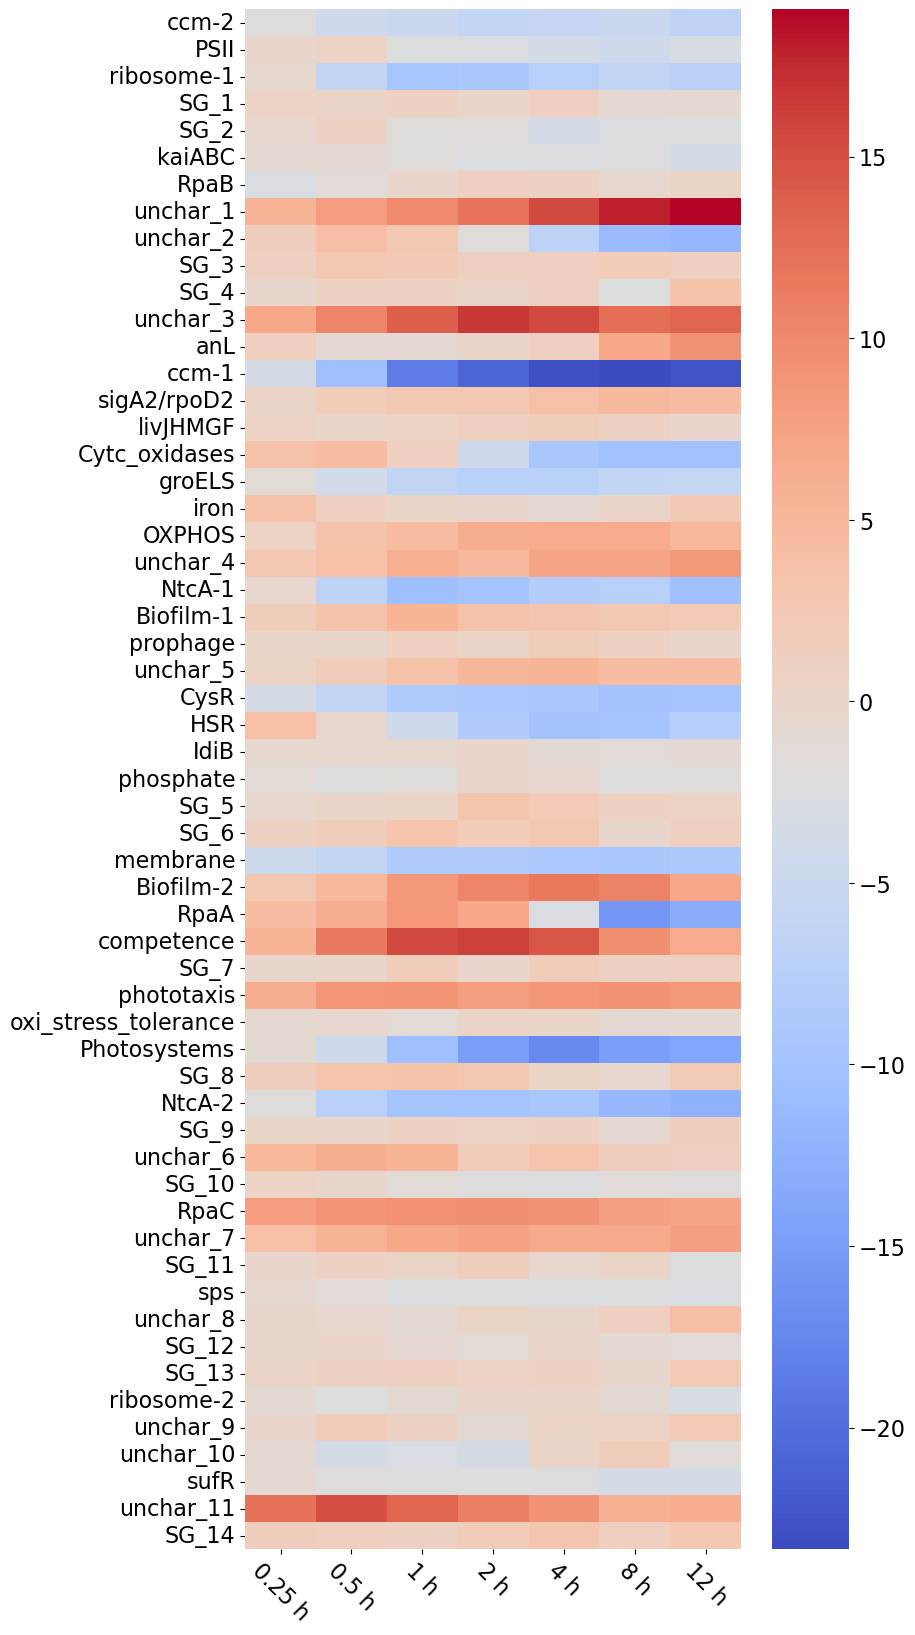

In [53]:
plt.figure(figsize=(8,20))
sns.heatmap(dark(ica_data,ica_data.imodulon_names),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Supplementary_data/Figures/S8.pdf',bbox_inches='tight',transparent=True)

## Figure S9

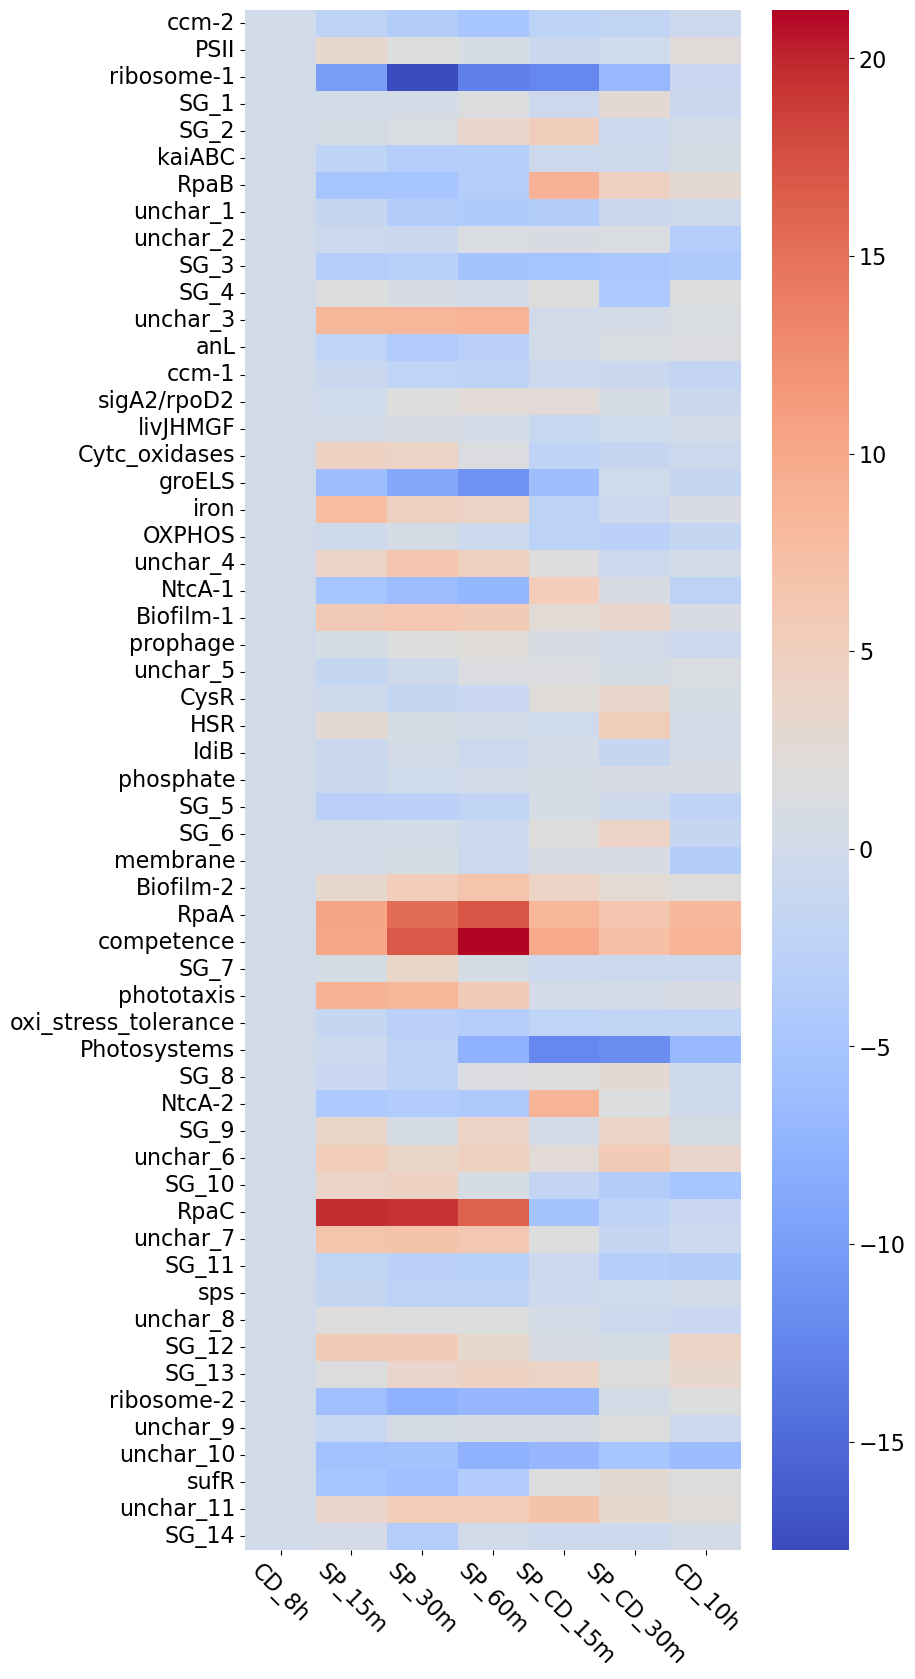

In [54]:
plt.figure(figsize=(8,20))
sns.heatmap(shade_pulse(ica_data,ica_data.imodulon_names),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Supplementary_data/Figures/S9.pdf',bbox_inches='tight',transparent=True)

## Figure S10

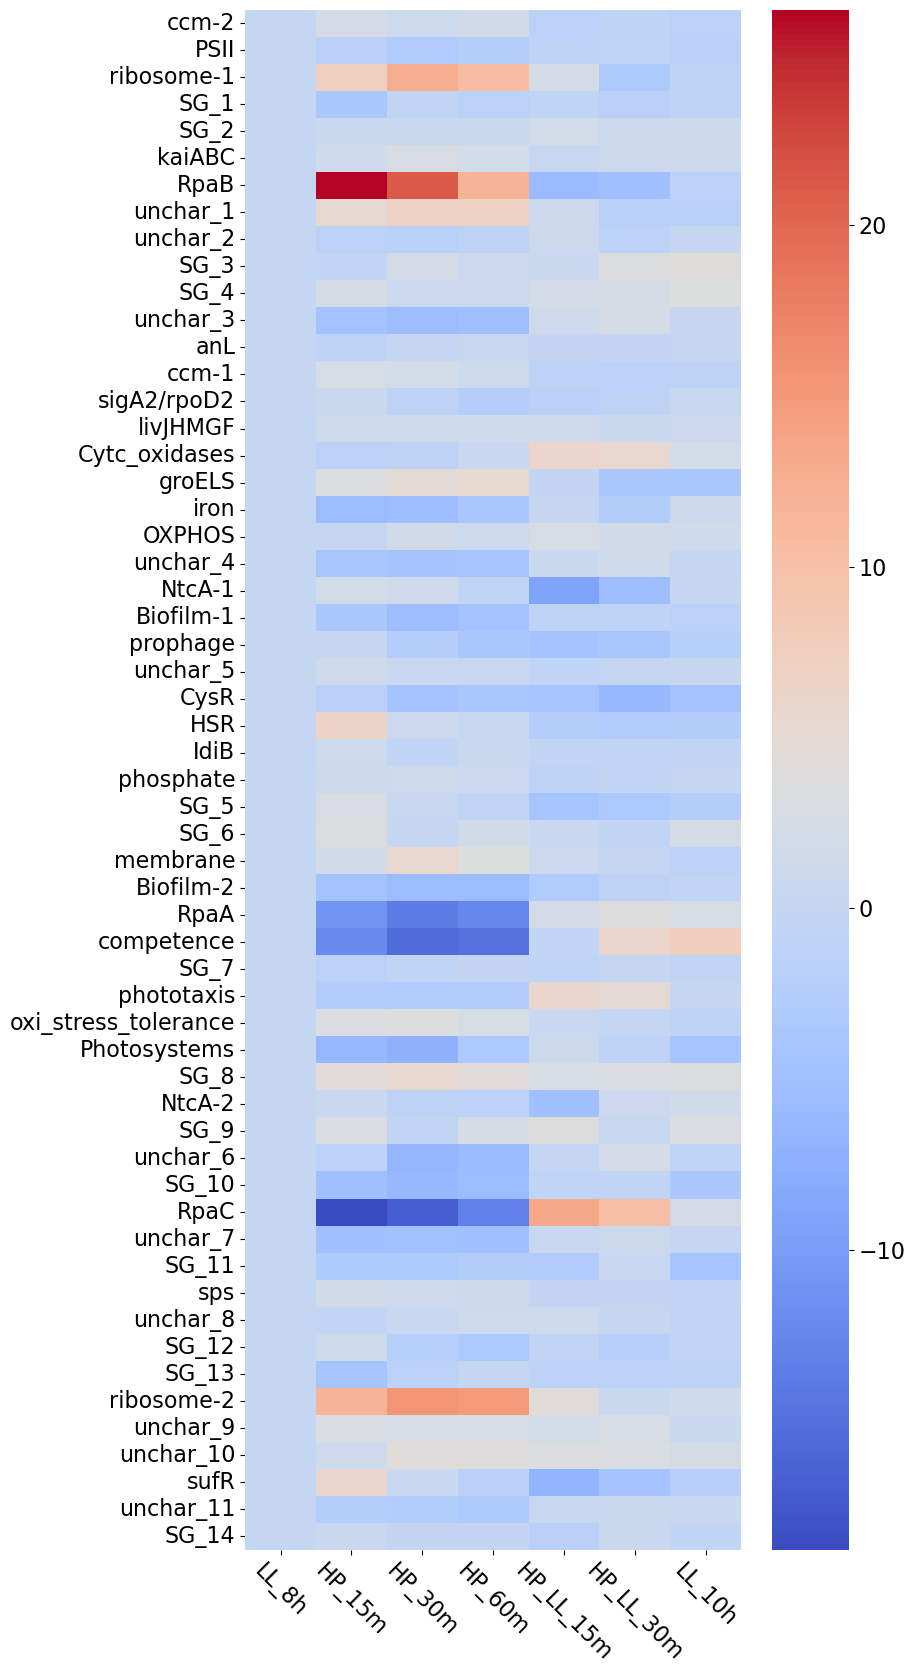

In [55]:
plt.figure(figsize=(8,20))
sns.heatmap(high_light(ica_data,ica_data.imodulon_names),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Supplementary_data/Figures/S10.pdf',bbox_inches='tight',transparent=True)

## Figure S11

In [56]:
DATA_DIR = '../data/processed_data/dimensions/'

In [57]:
def load_M(dim):
    return pd.read_csv(os.path.join(DATA_DIR,str(dim),'S.csv'),index_col=0)

def load_A(dim):
    return pd.read_csv(os.path.join(DATA_DIR,str(dim),'A.csv'),index_col=0)

In [58]:
# The optimal dimension folder is renamed to 130_optimal, which will throw an error
# Revert the folder name to 130 to fix the error
dims = sorted([int(x) for x in os.listdir(DATA_DIR)])
M_data = [load_M(dim) for dim in dims]
A_data = [load_A(dim) for dim in dims]

In [59]:
n_components = [m.shape[1] for m in M_data]

In [60]:
final_m = M_data[-1]
thresh = 0.7

In [61]:
final_m

0         1         2         3         4         5  \
Geneid                                                                         
HTX97_RS00010     0.020304  0.000052  0.006580  0.000533  0.008019  0.007558   
HTX97_RS00015     0.006098 -0.000422 -0.014971  0.041655 -0.016468  0.002186   
HTX97_RS00020    -0.005497 -0.013546 -0.050608  0.028033  0.005142  0.006272   
HTX97_RS00025    -0.003959  0.018782  0.002522 -0.000771 -0.001171  0.008051   
HTX97_RS00030    -0.006378 -0.011050 -0.004860  0.049042 -0.002920  0.017021   
...                    ...       ...       ...       ...       ...       ...   
Synpcc7942_B2649 -0.035966 -0.039141 -0.007134  0.013110 -0.001022 -0.003869   
Synpcc7942_B2650 -0.018401  0.010248  0.013047 -0.019684 -0.047747 -0.015749   
Synpcc7942_B2660 -0.056803  0.037462 -0.002408 -0.016915 -0.017849 -0.018095   
Synpcc7942_B2651  0.000952 -0.013060 -0.007392  0.034452 -0.010959 -0.008286   
Synpcc7942_B2653 -0.015965  0.008173  0.002390 -0.000016  0.010765 -0.021053   

                         6         7         8         9  ...       112  \
Geneid                                                    ...             
HTX97_RS00010     0.006821  0.001121  0.002609 -0.017749  ... -0.015176   
HTX97_RS00015    -0.017724  0.011552 -0.000094 -0.000108  ... -0.010294   
HTX97_RS00020    -0.061705 -0.002498 -0.001448 -0.002339  ... -0.009768   
HTX97_RS00025    -0.015646  0.579263  0.000278 -0.010142  ...  0.026827   
HTX97_RS00030    -0.022897  0.032178 -0.000812 -0.013203  ... -0.014716   
...                    ...       ...       ...       ...  ...       ...   
Synpcc7942_B2649  0.002578  0.003316 -0.000509 -0.003489  ... -0.028623   
Synpcc7942_B2650  0.028197  0.005820 -0.001152 -0.011596  ...  0.023573   
Synpcc7942_B2660 -0.016796 -0.003387  0.000715  0.017150  ...  0.017132   
Synpcc7942_B2651 -0.000875 -0.000843 -0.000015 -0.001106  ... -0.021137   
Synpcc7942_B2653  0.003780 -0.004524  0.000008  0.001946  ... -0.008387   

                       113       114       115       116       117       118  \
Geneid                                                                         
HTX97_RS00010     0.023031 -0.002438  0.001001 -0.016727  0.009135  0.010141   
HTX97_RS00015    -0.017399 -0.000099  0.021750  0.002260 -0.013438  0.016589   
HTX97_RS00020    -0.003420 -0.003340  0.007046  0.003652 -0.033715  0.017618   
HTX97_RS00025     0.019741 -0.010409  0.006479  0.000246  0.014088  0.006048   
HTX97_RS00030    -0.044318 -0.014379 -0.008838 -0.005132 -0.001400  0.020363   
...                    ...       ...       ...       ...       ...       ...   
Synpcc7942_B2649  0.020646 -0.005877  0.011444  0.002935 -0.039358  0.003541   
Synpcc7942_B2650 -0.070366  0.023854 -0.016532 -0.080330 -0.004017  0.017647   
Synpcc7942_B2660  0.008579  0.015305  0.008850 -0.002704  0.001987 -0.015208   
Synpcc7942_B2651  0.011917  0.024701 -0.001443  0.007331 -0.003113 -0.004130   
Synpcc7942_B2653  0.004965 -0.000939  0.028580  0.005078  0.000723  0.002284   

                       119       120       121  
Geneid                                          
HTX97_RS00010    -0.020815  0.012103  0.012632  
HTX97_RS00015    -0.010127  0.006500 -0.022068  
HTX97_RS00020    -0.031941 -0.041998 -0.004921  
HTX97_RS00025     0.035309  0.018089 -0.004115  
HTX97_RS00030     0.006678  0.018328 -0.000505  
...                    ...       ...       ...  
Synpcc7942_B2649  0.003603  0.002498  0.107906  
Synpcc7942_B2650  0.002766  0.020668  0.032392  
Synpcc7942_B2660 -0.003886  0.013552  0.002202  
Synpcc7942_B2651 -0.001184 -0.008008  0.007012  
Synpcc7942_B2653  0.008555  0.018684 -0.011550  

[2669 rows x 122 columns]

In [62]:
n_final_mods = []
for m in tqdm(M_data):
    corrs = pd.DataFrame(index=final_m.columns,columns=m.columns)
    for col1 in final_m.columns:
        for col2 in m.columns:
            corrs.loc[col1,col2] = abs(stats.pearsonr(final_m[col1],m[col2])[0])
    n_final_mods.append(len(np.where(corrs > thresh)[0]))

  0%|          | 0/27 [00:00<?, ?it/s]

In [63]:
n_single_genes = []
for m in tqdm(M_data):
    counter = 0
    for col in m.columns:
        sorted_genes = abs(m[col]).sort_values(ascending=False)
        if sorted_genes.iloc[0] > 2 * sorted_genes.iloc[1]:
            counter += 1
    n_single_genes.append(counter)

  0%|          | 0/27 [00:00<?, ?it/s]

In [64]:
non_single_components = np.array(n_components) - np.array(n_single_genes)

In [65]:
DF_stats = pd.DataFrame([n_components,n_final_mods,non_single_components,n_single_genes],
                        index=['Robust Components','Final Components','Multi-gene Components',
                        'Single Gene Components'],
                        columns=dims).T
DF_stats.sort_index(inplace=True)

In [66]:
dimensionality = DF_stats[DF_stats['Final Components'] >= DF_stats['Multi-gene Components']].iloc[0].name
print('Optimal Dimensionality:',dimensionality)

Optimal Dimensionality: 130


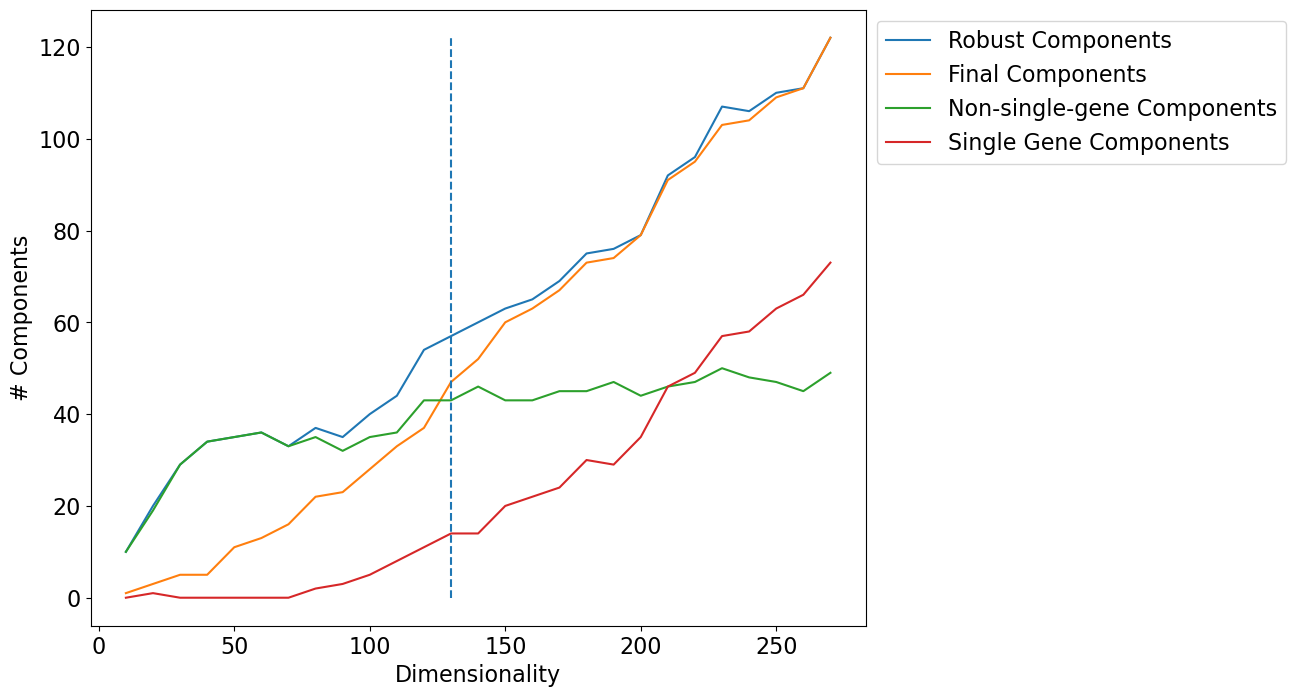

In [67]:
plt.figure(figsize=(10,8))
plt.plot(dims,n_components,label='Robust Components')
plt.plot(dims,n_final_mods,label='Final Components')
plt.plot(dims,non_single_components,label='Non-single-gene Components')
plt.plot(dims,n_single_genes,label='Single Gene Components')

plt.vlines(dimensionality,0,max(n_components),linestyle='dashed')

plt.xlabel('Dimensionality')
plt.ylabel('# Components')
plt.legend(bbox_to_anchor=(1,1))

# plt.savefig('../data/Supplementary_data/Figures/S11.pdf',bbox_inches='tight',transparent=True)